# NLP : Systeme de recommandation basé sur le contenu 

In [358]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
import plotly.express as px
from pylab import *
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import preprocessing
import texthero as hero
from IPython.display import Image, HTML
from wordcloud import WordCloud, STOPWORDS
from matplotlib.collections import LineCollection
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from nltk.corpus import stopwords
# options pandas pour lire entièrement les fichiers au moins jusqu'à 999 lignes et 999 colonnes
pd.options.display.max_rows = 500000
pd.options.display.max_columns = 500000

## Idée d'application

**Le système de recommandation basé sur le contenu :** 
Méthode basé sur le contenu : l'utilisateur se verra recommander des éléments semblables (au sens d'une mesure de similarité entre éléments) à ceux qu'il a préférés dans le passé.

**Principe de l'application :**
L'utilisateur pourra rentrer un type de plat préparé et choisir le plats selon la notation du nutriscore. 

**But principal :** 

Faciliter le choix des produits aux consommateurs en fonction de leurs besoins grâce aux nutriscores. 

**Cible :**
Tous utilisateurs recherchant un produits préparés dans les supermarchés.

## NLP

NLP natural language procession est une branche de l'intelligence artificielle qui a pour but de faire comprendre à la machine le langage humain et de pouvoir l'interpreter. 

In [529]:
#importation des données
nlp_data = pd.read_csv('nlp_data.csv', sep = ',' ,  nrows = 4707 ) 

In [530]:
nlp_data.head()

,Unnamed: 0,product_name,ingredients_text,nutriscore_grade,nutriscore_score,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
0,13,Salade de carottes râpées,NaN,b,1.0,134.0,0.1,3.9,1.5,0.9,0.42
1,35,Salade de macedoine de légumes,NaN,b,1.0,598.0,1.0,1.0,1.5,1.9,0.27
2,69,CORNED BEEF,NaN,d,17.0,983.0,7.5,1.0,1.5,24.0,2.00
3,88,Salade Grecque,NaN,b,1.0,268.0,2.3,1.4,1.5,3.7,0.40
4,322,Blanquette de Volaille et son Riz,"Riz précuit 40,4 % (eau, riz, huile de colza, ...",b,0.0,450.0,0.9,0.5,0.5,6.8,0.70


In [532]:
nlp_data_numerique = nlp_data.select_dtypes(include=[np.number])
num_cols = nlp_data_numerique.columns.values
print(num_cols)

['Unnamed: 0' 'nutriscore_score' 'energy_100g' 'saturated-fat_100g'
 'sugars_100g' 'fiber_100g' 'proteins_100g' 'salt_100g']


## Modélisation 

In [531]:
#conversion des colonnes en chaine de caractère
nlp_data["product_name"] = nlp_data["product_name"].astype('str')
nlp_data["ingredients_text"] = nlp_data["ingredients_text"].astype('str')
#concaténation des colonnes et transformation des données dans un format qui est adéquat pour lui appliquer les méthode NLP
nlp_data['contenu'] = nlp_data[["product_name","ingredients_text"]].apply(lambda x: ' || '.join(x), axis = 1)

In [426]:
#stopwords_list est la liste des mots inutiles à la compréhension du contenu comme un, de, à en espagnol et francais
stopwords_list = stopwords.words('french') + stopwords.words('spanish')

In [343]:
#jointure des données d'une même colonne et chaque donnée séparé par un espace vide
name_product = ''.join(nlp_data['product_name'])
Ingredient = ''.join(nlp_data['ingredients_text'])

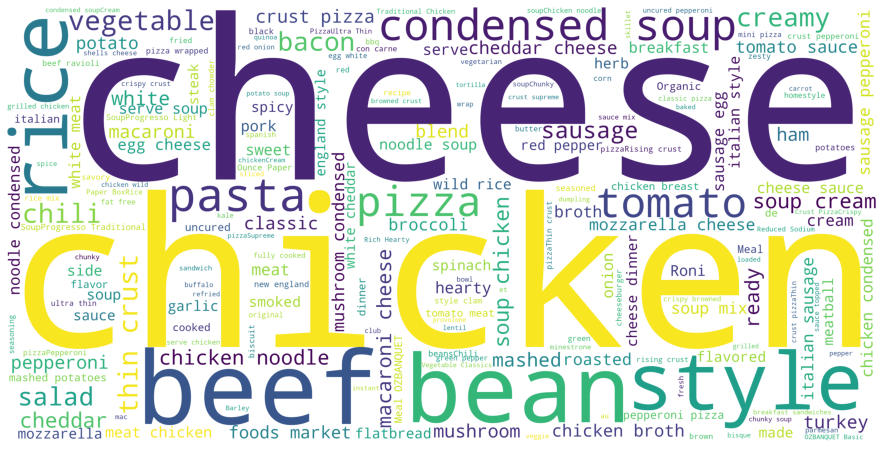

In [344]:
#Mettre en avant les mots résurrents de notre dataset
name_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(name_product)
plt.figure(figsize = (16,8))
plt.imshow(name_wordcloud)
plt.axis('off')
plt.show()

Les mots qui reviennent le plus dans "product_name" : Boeuf, fromage, poulet

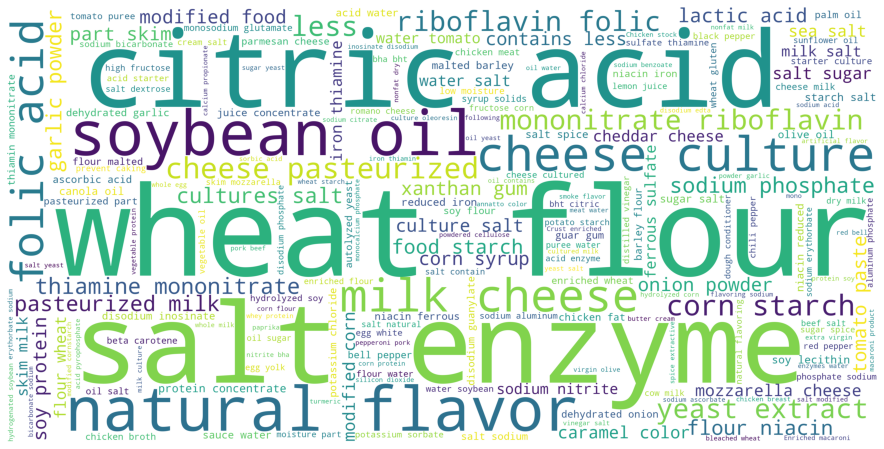

In [345]:
#Mettre en avant les mots résurrents de notre dataset
name_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(Ingredient)
plt.figure(figsize = (16,8))
plt.imshow(name_wordcloud)
plt.axis('off')
plt.show()

Les aliments qui reviennent le plus dans les listes des différents ingrédients de chacun des produits sont : le sel, les enzymes, la sauce soja, l'huile, la farine de blé, l'acide citrique.

La plupart de ces ingrédients ne sont pas bon pour la santé, le sel en trop grande quantité favorise les maladies cardio-vasculaire, l'acide citrique est un additif pour réguler l'acidité et c'est aussi un exhausteur de gout. La sauce soja est ou trop salé ou trop sucré. On trouve également les arôme naturel.

In [490]:
#Tfidfvectorizer compte le nombre de fois ou le mot est mentionné et effectue le calcul idf et tf-idf 
vectorizers = TfidfVectorizer(analyzer='word',
                     max_features=5000,
                     stop_words=stopwords_list)

In [517]:

#Cette étape permet de transférer les données en forme de matrice en normalisant chaque vecteur
matriceTfidf = vectorizers.fit_transform(nlp_data['contenu'])

In [518]:
#On a 4707 lignes et 4461 mots uniques
matriceTfidf.shape

(4707, 4461)

In [519]:
premier_vecteur_tfidfvectorizer = matriceTfidf[0] 
df = pd.DataFrame(premier_vecteur_tfidfvectorizer.T.todense(), index=vectorizers.get_feature_names(), columns=["tfidf"]) 
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
râpées,0.614091
carottes,0.520468
salade,0.467601
nan,0.365178
pasteuruzed,0.000000
patata,0.000000
pasturized,0.000000
pastuerized,0.000000
pastry,0.000000
pastreurized,0.000000


In [535]:
#Cette fonction donnera les 10 noms de produits le plus proche du produits entré par l'utilisateur
def get_recommendations(input_useres):
  
    input_user = [input_useres]
    input_user = vectorizers.transform(input_user)
    cosin_similarity = linear_kernel(input_user, matriceTfidf)
    tri_score_indice = cosin_similarity.argsort()
    tri = tri_score_indice[0,-11:-1]
    tri = tri.tolist()
    df_product_name = pd.DataFrame(nlp_data[['product_name','energy_100g', 'saturated-fat_100g',
 'sugars_100g', 'fiber_100g', 'proteins_100g' ,'salt_100g', 'nutriscore_grade']], columns= ['product_name','energy_100g', 'saturated-fat_100g',
 'sugars_100g', 'fiber_100g' ,'proteins_100g', 'salt_100g', 'nutriscore_grade'])
    
    return df_product_name.iloc[tri]

 

In [536]:
get_recommendations("Riz pilaf")

,product_name,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutriscore_grade
1297,"Poulet au citron vert, mini epis de mais et ri...",519.0,0.9,4.80,1.5,7.60,0.5500,b
4,Blanquette de Volaille et son Riz,450.0,0.9,0.50,0.5,6.80,0.7000,b
3244,Rice medley rice pilaf rice & pasta mix with h...,1582.0,0.0,2.22,2.2,8.89,1.0000,b
2812,"Food lion, rice pilaf mix",1418.0,0.0,0.00,1.8,8.93,3.4375,d
4377,"Essential everyday, pilaf rice mix",1494.0,0.0,0.00,1.4,10.00,2.6075,d
457,"Roundy's, pilaf rice mix",1418.0,0.0,0.00,3.6,8.93,2.4550,d
83,"Salade à la Mexicaine au Maïs doux, Poivrons, ...",586.0,0.7,3.20,2.8,3.10,0.5500,b
135,"Salade De Riz, Haricots Noirs Et Feta",711.0,3.2,0.20,5.7,5.40,0.7300,NaN
1294,"Rice pilaf & pasta mix, rice pilaf",1494.0,0.0,1.79,1.8,8.93,3.4375,d
4243,"Original pilaf quinoa blend, original pilaf",1490.0,0.0,2.22,4.4,11.11,1.5000,b


In [537]:
get_recommendations("Salade")

,product_name,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutriscore_grade
1,Salade de macedoine de légumes,598.0,1.0,1.0,1.5,1.9,0.27,b
2613,Salade De poulet Roti Et Bacon,356.0,0.9,1.9,1.5,11.9,0.63,a
2047,"Salade de poulet, tomates et basilic",695.0,0.9,2.7,1.5,16.7,0.45,a
0,Salade de carottes râpées,134.0,0.1,3.9,1.5,0.9,0.42,b
1374,Salade de poulet rôti,397.0,0.5,0.7,1.5,6.4,0.48,b
69,Salade poulet caesar,1619.0,7.4,4.8,1.5,25.0,2.10,e
21,Salade fusili,523.0,0.4,1.4,1.3,6.7,0.50,a
2612,Salade de poulet au basilic,444.0,1.0,1.5,1.5,11.3,0.60,a
78,Salade de lentilles,699.0,1.7,2.0,1.5,7.1,1.00,NaN
3,Salade Grecque,268.0,2.3,1.4,1.5,3.7,0.40,b


In [538]:
get_recommendations("pizza")

,product_name,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutriscore_grade
563,"Spartan, pizza bites, sausage & pepperoni pizz...",1033.0,2.94,2.35,2.40,7.06,1.3225,c
1125,Ristorante pizza,699.0,1.70,2.00,1.50,7.10,1.0000,NaN
6,Pizza prosciutto,824.0,2.90,2.10,1.50,11.00,1.5000,c
3693,Portabella Pizza,389.0,2.33,1.16,1.20,5.81,0.5825,b
2683,Margherita pizza,908.0,3.90,2.70,6.40,2.10,0.8300,b
143,Uncured pepperoni pizza,1170.0,6.78,3.39,2.54,12.70,1.6900,d
1349,"Cheese, pepperoni & sausage pizza, cheese, pep...",954.0,4.41,1.47,1.50,13.97,1.1225,c
1347,"Cheese & sausage frozen pizza, cheese & sausage",858.0,3.21,1.28,1.30,14.10,0.8325,b
1348,"Cheese & pepperoni frozen pizza, cheese & pepp...",983.0,4.70,1.34,1.30,14.77,1.1400,c
1350,Supreme frozen pizza,795.0,3.52,1.41,1.40,11.97,0.8975,b


In [539]:
get_recommendations("macaroni")

,product_name,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutriscore_grade
4297,Deluxe Macaroni & Cheese Dinner,1351.0,3.54,3.03,2.0,12.12,2.0700,d
348,Macaroni & cheese dinner,1552.0,1.43,8.57,2.9,12.86,2.0725,d
1259,Macaroni N' Cheese Dinner,1494.0,1.43,8.57,2.9,14.29,2.1775,d
717,"Wild harvest, macaroni shells & white cheddar ...",1552.0,2.14,7.14,1.4,14.29,2.1075,d
4072,Macaroni & Cheese,1494.0,0.00,2.86,4.3,8.57,2.0725,c
716,"Wild harvest, macaroni & white cheddar cheese ...",1552.0,2.14,7.14,1.4,14.29,2.1075,d
2200,"Macaroni salad, macaroni",1197.0,3.57,2.68,0.9,2.68,1.1375,d
3039,"Macaroni & cheese dinner, mini shells, macaron...",1443.0,0.60,7.14,2.4,11.90,2.0525,d
2625,"Macaroni & beef in tomato sauce, macaroni & beef",418.0,1.41,2.01,1.2,3.61,0.7225,b
3788,"Macaroni & cheese dinner, macaroni & cheese",1494.0,0.00,10.00,1.4,11.43,2.0725,d


In [540]:
get_recommendations("sandwich")

,product_name,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutriscore_grade
2799,Roast beef & white cheddar sandwich,1096.0,4.29,2.38,0.5,16.67,1.8800,d
2522,KID CUISINE Chicken Sandwich,841.0,2.45,4.90,3.4,6.37,0.6500,b
2313,Ham Wedge Sandwich,703.0,2.55,1.53,1.5,13.27,1.3525,c
2383,"Chicken salad sandwich, chicken",1033.0,2.02,2.02,3.0,14.65,1.0725,b
361,Sandwich Rolls,1033.0,0.59,7.06,2.4,8.24,1.0600,b
2670,Sandwich,1954.0,11.67,3.33,13.3,10.00,1.2500,d
326,White sandwich slims,874.0,0.00,2.33,9.3,6.98,0.9300,a
4558,Gourmet poorboy sub sandwich,703.0,3.70,1.85,0.8,10.25,1.4750,d
86,"Sandwich Dinde, farce et bacon",2100.0,5.20,10.30,1.5,31.50,2.2300,e
93,Sandwich Poulet Rôti & Avocat,862.0,1.00,2.30,1.5,11.20,0.9000,b


In [541]:
get_recommendations("saumon")

,product_name,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutriscore_grade
1568,Artisan pizza,1109.0,6.06,6.06,1.5,11.36,1.7225,d
1567,"Gotta luv meat uncured pepperoni, italian styl...",1113.0,6.29,2.80,1.4,11.89,2.0275,d
1566,Pesto & fresh mozzarella sprouted & ancient gr...,1138.0,6.33,1.27,1.3,10.76,1.1875,d
1565,Prosciutto & arugula sprouted & ancient grain ...,1176.0,6.85,2.74,1.4,13.01,1.6600,d
1564,Rich traditional tomato sauce topped with mozz...,1046.0,4.17,3.47,1.4,10.42,1.3725,d
1570,Wild alaskan keta salmon,661.0,0.88,3.51,0.0,24.56,2.8075,d
12,Lasagnes aux saumon et aux épinards,527.0,2.30,1.50,1.5,6.50,0.7900,b
1977,Gravadlax with Mustard and Dill Sauce,782.0,2.20,5.00,0.0,22.70,4.1300,d
3450,Sicilian-Style Salmon,582.0,1.50,3.50,1.5,4.60,0.4300,b
29,Wrap Saumon guacamole,916.0,2.10,2.10,0.6,9.70,1.5000,c


In [542]:
nlp_data.head()

,Unnamed: 0,product_name,ingredients_text,nutriscore_grade,nutriscore_score,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,contenu
0,13,Salade de carottes râpées,nan,b,1.0,134.0,0.1,3.9,1.5,0.9,0.42,Salade de carottes râpées || nan
1,35,Salade de macedoine de légumes,nan,b,1.0,598.0,1.0,1.0,1.5,1.9,0.27,Salade de macedoine de légumes || nan
2,69,CORNED BEEF,nan,d,17.0,983.0,7.5,1.0,1.5,24.0,2.00,CORNED BEEF || nan
3,88,Salade Grecque,nan,b,1.0,268.0,2.3,1.4,1.5,3.7,0.40,Salade Grecque || nan
4,322,Blanquette de Volaille et son Riz,"Riz précuit 40,4 % (eau, riz, huile de colza, ...",b,0.0,450.0,0.9,0.5,0.5,6.8,0.70,Blanquette de Volaille et son Riz || Riz précu...


Les mots avec une basse valeur de tf idf sont soit tres courant dans l'ensemble des documents, soit utilisés seulement de manière modéré et uniquement dans de très long documents. De manière interessante, la plupart des réultats correspondants à une valeur tf idf élevée identifient en fait des ingrédients précis.